**Contents**


1. [Open files](#open_files)


2. [Data preprocessing](#preprocessing)
    
      2.1 [Missing values](#missing_values)
      
      2.2 [Valuable types](#types)
    
      2.3 [Duplicates processing](#duplicates) 
    
      2.4 [Outliers](#outliers)
      

3. [New variables](#new_variables)
      
      3.1 [Price per square meter](#meter_price)
      
      3.2 [Day of the week the ad was posted](#day_of_week)
      
      3.3 [Month the ad was posted](#month)
      
      3.4 [Year the ad was posted](#year)
      
      3.5 [Floor type](#floor_type)
      
      3.6 [Distance to city center in kilometers](#km_city_center)


4. [EDA](#exploratory_analysis)

      4.1 [Object parameters](#obj_params)
      
      4.2 [Selling speed](#speed)
      
      4.3 [Object cost factors](#cost_factors)
      
      4.4 [10 locations with the largest number of ads](#top10_locations)
      
      4.5 [Distance to city center and object price](#citycenter_price)


6. [General conclusion](#conclusion)

# Ads study for the sale of apartments

**Input data**: The data of the Yandex.Realty service is available - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

**Purpose**: To learn how to determine the market value of real estate: to set the parameters that will allow to build an automated system, track anomalies, and fraudulent activity.

In [1]:
# Loading the required libraries
import pandas as pd

<a id="open_files"></a> 

## Open files

In [2]:
# Reading data
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Displaying the first 10 rows of dataset
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


The data was read correctly.

To better see the structure of the dataset, let's look at general information about the data.

In [4]:
# General information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In total, the dataset has 22 columns and about 24 thousand rows. There are missing values in almost every column, and some data types are not stored correctly.

Let's also look at the distributions for all columns of the dataset.

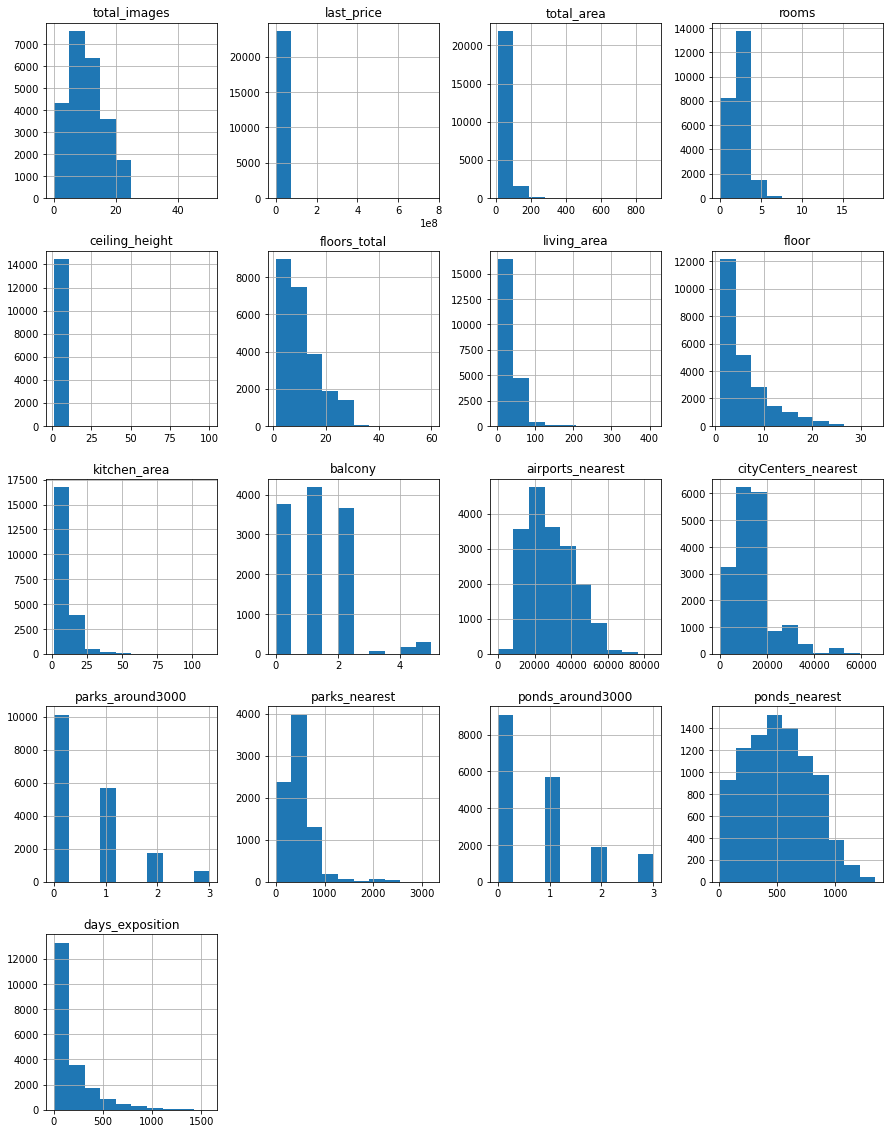

In [5]:
# Histograms for all columns of the dataset
data.hist(figsize=(15, 20));

**Graph Conclusions:**

- `total_images` - the distribution resembles the classical Normal distribution (it looks like a bell "cut off" along the zero line);
- `last_price` - the graph is plotted on a logarithmic scale ("discarded" 8 zeros). Most of the apartments were sold for less than 100 million. Most likely the data has outliers - very expensive real estate;
- `total_area` - most apartments have an area of up to 200 square meters;
- `rooms` - most apartments have up to 5 rooms;
- `ceiling_height` - the graph of ceiling height distribution is not indicative here. Most likely, the data has outliers that skewed the distribution of the variable (for example, someone indicated the height of the ceilings in centimeters);
- `floors_total` - the distribution of the number of floors in the houses also resembles Poisson. Most apartments are located in buildings up to 20 floors;
- `living_area` - most apartments have a living area of up to 100 square meters;
- `floor` - an abnormally large number of apartments grouped at a value of 0 floors (strange), will need to be checked separately;
- `kitchen_area` - most apartments have a kitchen area of up to 25 square meters;
- `balcony` - an approximately equal number of apartments have 0, 1 or 2 balconies;
- `airports_nearest` - the distribution is similar to right-skewed. Many apartments are located 10-40 kilometers from the airport;
- `cityCenters_nearest` - the distribution has obvious outliers in the region of large values. Many apartments are located up to 20 kilometers from the city center;
- `parks_around3000` - the distribution is skewed to the right - many apartments are located not near the park or have 1 park in the nearest district;
- `parks_nearest` - in the distribution, growth is noticeable in the region of large values. Most of the apartments are located one kilometer from the nearest park. It would be worth checking how these data agree with the previous column, according to which almost half of the apartments are located more than 3 kilometers from the nearest park;
- `ponds_around3000` - many apartments are located not near a water body or have 1 body of water in the nearest district;
- `ponds_nearest` - Poisson-like distribution. A peak is noticeable in the region of a value of 500 meters to the nearest reservoir - typical for St. Petersburg;
- `days_exposition` - a large number of values are grouped around a small number of days, you need to look at the data more carefully.

<a id="preprocessing"></a> 


## Data preprocessing

<a id="missing_values"></a>

### Missing values

Let's find columns with missing values in the dataset and count their number.

In [6]:
# Number of missing values
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In 14 out of 22 columns, missing gaps were found, their number is not uniform: there are variables (for example, `locality_name`) with an insignificant number of gaps, there are variables (`balcony`, `is_apartment`, `parks_nearest`, `ponds_nearest`), where the number of gaps makes up the majority.


**Possible reasons for missing data:**

1) *Human factor.* When data is entered manually, problems may arise - deliberate distortion and concealment of data, or accidental omissions.

For example, the seller might not have information about the height of the ceilings or the area of \u200b\u200bthe kitchen, and he left this column empty. Some items could be optional (for example, about apartments);

2) *Program error.* It is impossible to determine some indicators for the object.

For example, Yandex.Navigator was unable to determine the distance from an object to the nearest airport, body of water, or park (due to an incompletely specified address by the user or other reasons).

3) *Ad is not closed yet*. Values in the `days_exposition` column may be missing because the ad is still on the site.


**Options for replacing missing values:**

- `is_apartment` - replace gaps with the `False` value, since it is not possible to set the actual value. There is also a hypothesis that missing values can be interpreted as `False` - the object is not an apartment;
- `balcony` - replace gaps with zeros. If the number of balconies is not indicated, most likely there are none;
- `locality_name` - replace gaps with `Unknown`, since this parameter cannot be restored from the data;
- `parks_around3000` - replace gaps with zeros;
- `ponds_around3000` - replace gaps with zeros.


For the variables `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest` and `ponds_nearest` it is impossible to offer adequate replacements, so we will leave them as they are.

In [7]:
# Fill in the missing values
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data['locality_name'] = data['locality_name'].fillna('Неизвестно')
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Let's check that the missing values in these columns have been filled in.

In [8]:
# Number of missing values
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
# The ratio of median total area to median living area and kitchen area
koef_la = round(data['living_area'].median() / data['total_area'].median(), 3)
print('Ratio of median total area to median living area:', koef_la)

koef_ka = data['kitchen_area'].median() / data['total_area'].median()
print('Ratio of median total area to median kitchen area:', koef_ka)

Ratio of median total area to median living area: 0.577
Ratio of median total area to median kitchen area: 0.175


As a rule, the living area in real estate objects is 57.69% of the total area, and the kitchen area is 17.5% of the total area of the object. Let's replace the missing values in the `living_area` column by multiplying the readings of the total area by the coefficients 0.5769 and 0.175.

In [10]:
# Replacing gaps with median ratios
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] * koef_la
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area'] * koef_ka

Let's check that all the missing values have been filled in with the correct values.

In [11]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0000,8,False,...,25.000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6000,1,False,...,11.000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3000,4,False,...,8.300,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,91.7430,9,False,...,27.825,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0000,13,False,...,41.000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.4000,5,False,...,9.100,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.6000,6,False,...,14.400,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,41.3132,22,False,...,18.900,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.4300,26,False,...,8.810,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6000,7,False,...,6.500,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [12]:
# Sum of all missing values for living_area column
print('Missing values in living_area:', data['living_area'].isna().sum())

# Sum of all missing values for kitchen_area column
print('Missing values in kitchen_area:', data['kitchen_area'].isna().sum())

Missing values in living_area: 0
Missing values in kitchen_area: 0


The gaps in the `living_area` and `kitchen_area` columns have been filled in correctly.

<a id="types"></a>

### Valuable types

Some variables are represented by the wrong data type:

- `first_day_exposition` - it is necessary to change the type from object to datetime, so that it would be convenient to work with this parameter further;

- `is_apartment` - change from object to bool;

- `balcony` - change from float to int, since the number of balconies can only be an integer;

- `parks_around3000` - change from float to int, the number of parks can only be an integer;

- `ponds_around3000` - change from float to int, the number of ponds can only be an integer.

In [13]:
# Changing Variable Types
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                              format='%Y-%m-%dT%H:%M:%S')

data = data.astype({'is_apartment': 'bool', 
                    'balcony': 'int32', 
                    'parks_around3000': 'int32',
                    'ponds_around3000': 'int32'})

In [14]:
# Changing Variable Types
data = data.astype({'total_area': 'float32', 
                    'living_area': 'float32', 
                    'kitchen_area': 'float32'})

Let's check if we managed to change the data type.

In [15]:
# General information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float32       
 13  balcony         

The data types have been changed to the correct ones.

<a id="duplicates"></a>

### Duplicates processing

Let's check the data for obvious duplicates - completely identical rows.

In [16]:
data.duplicated().sum()

0

There are no obvious duplicates in the data.

Let's examine the data for implicit duplicates. Let's display unique values in the `locality_name` column - the names of settlements.

In [17]:
# Sorted list of unique values in locality_name column
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Неизвестно',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровс

There are duplicates in the column. Let's write a function that will select from the names of settlements only the words necessary for analysis and use this function to replace the names of settlements.

In [18]:
# Function to remove keywords from the names of settlements
def del_duplicates(locality_name):
    
    try:
        # The list_del sheet contains the keywords that we will remove from the titles
        list_del = ['городской ', 'поселок ', 'посёлок ', 'деревня ','коттеджный ', 'городского', 
                    'типа ', 'имени ', 'при ', 'железнодорожной ', 'станции ', 'село ',
                    'садоводческое ', 'садовое ', 'некоммерческое ', 'товарищество ']
        
        # For each del_name keyword from the list_del list:
        for del_name in list_del:
            # If the keyword is in the title:
            if del_name in locality_name:
                # overwrite title without keyword
                locality_name = locality_name.replace(del_name, '')
        # The function returns the name without spaces on both sides     
        return locality_name.strip()
        
    except:
        pass

In [19]:
# Overwriting the locality_name column using the del_duplicates function
data['locality_name'] = data['locality_name'].apply(del_duplicates)

Let's check that the function worked correctly: all words, except for proper names, should have been removed from the names of settlements.

In [20]:
# Sorted list of unique values in locality_name column
sorted(data['locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

Dealing with implicit duplicates in the `locality_name` column was successful.

<a id="outliers"></a>


### Outliers

Let's look at the descriptive statistics for the slabs with quantitative data, which showed outliers in the graphs in the item [Open files](#open_files) in order to identify anomalies in the data.

In [21]:
# Function for displaying Descriptive statistics and Boxplots for selected column
def info_and_boxplot(column):
    
    # Descriptive statistics for column
    print(data[column].describe())
    
    print()
    
    # Boxplot for column
    print(data.boxplot(column=[column]))

**last_price**

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


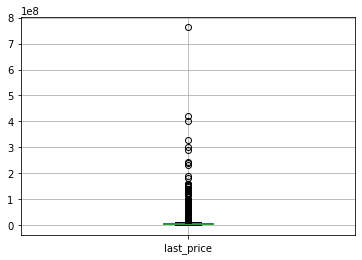

In [22]:
info_and_boxplot('last_price')

The distribution looks realistic: the interquartile range of apartment prices is from 3,400,000 to 6,800,000, which sounds plausible. However, there are ultra-low (12,190) and super-high (763,000,000) prices. Perhaps some sellers indicated the price per square meter, mistyped in the number of zeros, or these are real market prices for real estate (cheap apartments - far from the city center, without repair, etc.; super-expensive - with a large area, excellent repair, in expensive LCD, etc.).


Let's build a boxplots with a mustache for this column - outliers are seen better on it.

There are a lot of observations with ultra-high price values. The most "knocked out" object worth more than 700 million. Let's delete this line.

In [23]:
# Removing outliers
data = data[data['last_price'] < 700000000]

**total_area**

count    23698.000000
mean        60.334442
std         35.586437
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875002
max        900.000000
Name: total_area, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


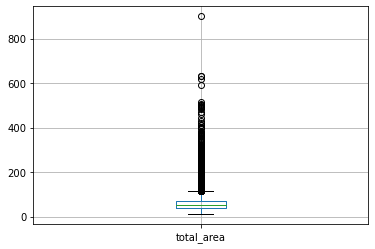

In [24]:
info_and_boxplot('total_area')

Again, there are too large apartments (an area of 900 square meters is a lot ...) and tiny apartments (12 square meters). Perhaps this is real data, but errors are also likely when entering data manually. Otherwise, the distribution seems to be plausible - the median value is 52 square meters. meters, and the interquartile range is 40 - 70 square meters. meters.

Let's look at the boxplot.

The most outstanding values are with a total area of more than 580 square meters. meters. Let's try to "cut off" these apartments from the sample.

In [25]:
# Removing outliers
data = data[data['total_area'] < 580]

**rooms**

count    23693.000000
mean         2.068839
std          1.071414
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


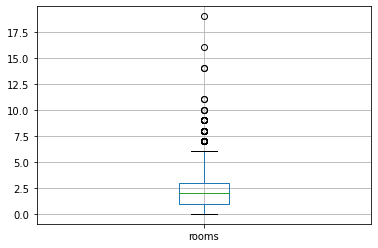

In [26]:
info_and_boxplot('rooms')

It turns out that there are apartments with 11-19 rooms (apparently they are so expensive), so we will not delete lines with such values.

**ceiling_height**

count    14500.000000
mean         2.771326
std          1.261170
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


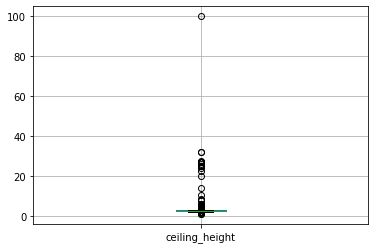

In [27]:
info_and_boxplot('ceiling_height')

Here we observe explicit outliers. It is logical to assume that, in fact, large ceiling heights could appear due to a different measurement scale or a missing comma. Since the nature of the outliers is obvious here, let's try to restore the original values.


Let's write a function that will convert the height of the ceilings to meters if it is more than the conditionally "adequate" value of 10 meters.

In [28]:
# Function to convert ceiling height to meters
def ceiling_to_m(ceiling_height):
    try:
        # If the ceiling height is more than 10 meters:
        if ceiling_height > 10:
            # Divide ceiling height by 10
            ceiling_height /= 10
        # The function returns the height of the ceilings
        return ceiling_height
    
    except:
        pass

In [29]:
# Overwriting the ceiling_height column using the ceiling_to_m function
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_to_m)

Let's check the descriptive statistics for the ceiling_height variable again.

count    14500.000000
mean         2.727914
std          0.299617
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


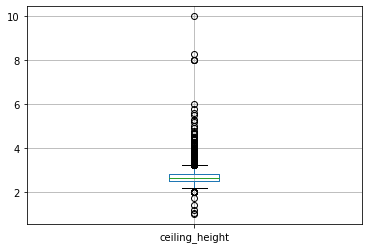

In [30]:
info_and_boxplot('ceiling_height')

We eliminated the most obvious outliers. It seems that we can remove the most deviant values - more than 6 meters.
Since ceilings up to 2 meters high also seem unrealistic (and are shown as "circles" on the graph), we will also throw them away.

In [31]:
# Removing outliers
data = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 6)]

In [32]:
# Replacing gaps with the median value
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [33]:
# Sum of all missing values for ceiling_height column
data['ceiling_height'].isna().sum()

0

Great, all the gaps in the `ceiling_height` column have been filled in.

**living_area**

count    14477.000000
mean        35.735737
std         22.639196
min          2.000000
25%         19.700001
50%         30.799999
75%         43.150002
max        347.500000
Name: living_area, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


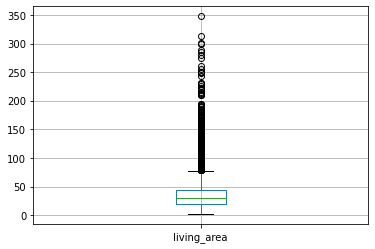

In [34]:
info_and_boxplot('living_area')

**kitchen_area**

count    14477.000000
mean        10.548039
std          6.140984
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.199997
Name: kitchen_area, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


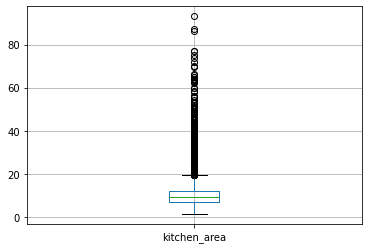

In [35]:
info_and_boxplot('kitchen_area')

In the `living_area` and `kitchen_area` variables, as with other types of area, the distribution generally resembles a realistic one, but there are unexplained outliers - very large and very small area values. Suppose there are apartments with such areas.

**balcony**

count    14477.000000
mean         0.679975
std          1.015707
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


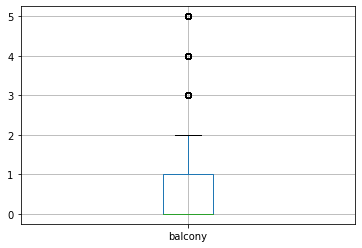

In [36]:
info_and_boxplot('balcony')

There are probably apartments with five balconies (most likely those with a large area and cost), although this is rare, since three-quarters of the apartments have only one balcony.

**cityCenters_nearest**

count    11543.000000
mean     14068.179849
std       8760.530119
min        181.000000
25%       9051.000000
50%      12964.000000
75%      16034.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


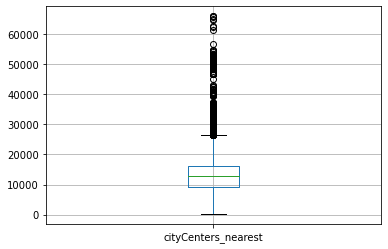

In [37]:
info_and_boxplot('cityCenters_nearest')

**parks_nearest**

count    5285.000000
mean      476.628761
std       320.056250
min         3.000000
25%       285.000000
50%       448.000000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


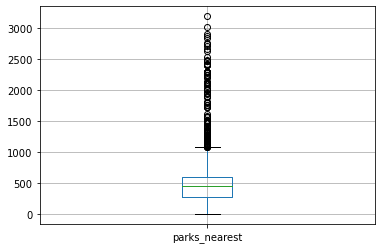

In [38]:
info_and_boxplot('parks_nearest')

In the `cityCenters_nearest` and `parks_nearest` variables, upon closer inspection, you can see the logic: some apartments are located far from the city center and parks, some are right in the center and close to the park.

**days_exposition**

count    12029.000000
mean       190.507357
std        228.818256
min          1.000000
25%         45.000000
50%        103.000000
75%        248.000000
max       1580.000000
Name: days_exposition, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


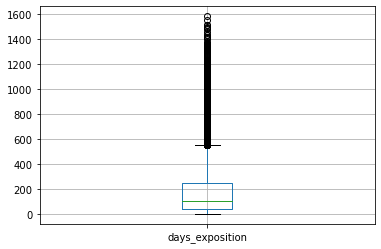

In [39]:
info_and_boxplot('days_exposition')

Half of all apartments were sold within three months. The minimum period for which the ad was closed is one day. And some objects have not been sold for 4 years. Strange. However, we will not remove all outliers, since they are distributed almost evenly.

**Findings on data preprocessing:**

- Some columns in the dataset were stored in the wrong type, which has been fixed;

- Gaps were observed in 14 out of 22 columns, the nature of which can be divided into two conditional groups: "human factor" (for data that was entered manually) and "software error" (for automatic calculations);

- Emissions were encountered in a number of factors, the nature of some could not be established. It turned out to work with the rest of the outliers and reduce their number (remove implausible values and transfer the data to another scale).

<a id="new_variables"></a>

## New variables

Let's add new important columns in the dataset.

<a id="meter_price"></a>

### Price per square meter

In [40]:
# Price per square meter = price for the whole apartment / area of the apartment
data['price_per_m'] = data['last_price'] / data['total_area']

<a id="day_of_week"></a>

### Day of the week the ad was posted

In [41]:
# Adding a day of the week
data['week_day'] = data['first_day_exposition'].dt.weekday

<a id="month"></a>

### Month the ad was posted

In [42]:
# Adding a publication month
data['month'] = data['first_day_exposition'].dt.month

<a id="year"></a>

### Year the ad was posted

In [43]:
# Adding a publication year
data['year'] = data['first_day_exposition'].dt.year

<a id="floor_type"></a>

### Floor type

In [44]:
# Function to determine floor type
def floor_type(floor_nums):
    
    try:
        floor = floor_nums['floor']
        floors_total = floor_nums['floors_total']
        
        # The floor type is calculated as the difference between 
        # the number of floors in the whole house 
        # and the floor of the apartment
        floor_position = floors_total - floor
        
        # If the difference is zero
        if floor_position == 0:
            # the apartment is located on the top floor
            return 'Top'
        
        # If the difference is only 1 less than the number of floors in the house
        elif floor_position == floors_total - 1:
            # the apartment is located on the ground floor
            return 'Ground'
        
        # In other cases
        else:
            # Other floor
            return 'Other'
        
    except:
        return 'Not defined'

In [45]:
# Apply the floor_type function, creating a column with the same name
data['floor_type'] = data.apply(floor_type, axis=1)

<a id="km_city_center"></a>

### Distance to city center in kilometers

In [46]:
# Convert meters to kilometers: 1 km = 1000 m
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

Let's check the transformations - we will display the first 20 lines of the updated dataset.

In [47]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,week_day,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,Other,16.0
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,Other,8.0
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,False,...,NaN,0,NaN,289.0,88524.590164,6,2,2017,Other,15.0
10,5,5050000.0,39.599998,2017-11-16,1,2.67,12.0,20.299999,3,False,...,310.0,2,553.0,137.0,127525.257439,3,11,2017,Other,14.0
13,20,3550000.0,42.799999,2017-07-01,2,2.56,5.0,27.000000,5,False,...,294.0,3,298.0,366.0,82943.926712,5,7,2017,Top,33.0
16,11,6700000.0,82.000000,2017-11-23,3,3.05,5.0,55.599998,1,False,...,420.0,0,NaN,397.0,81707.317073,3,11,2017,Ground,11.0
18,8,3250000.0,31.000000,2017-01-27,1,2.50,5.0,19.400000,2,False,...,759.0,0,NaN,168.0,104838.709677,4,1,2017,Other,11.0
19,16,14200000.0,121.000000,2019-01-09,3,2.75,16.0,76.000000,8,False,...,NaN,0,NaN,97.0,117355.371901,2,1,2019,Other,13.0
20,12,6120000.0,80.000000,2017-09-28,3,2.70,27.0,48.000000,11,False,...,NaN,0,NaN,74.0,76500.000000,3,9,2017,Other,19.0
22,20,5000000.0,58.000000,2017-04-24,2,2.75,25.0,30.000000,15,False,...,NaN,0,NaN,60.0,86206.896552,0,4,2017,Other,NaN


All new columns are added correctly.

<a id="exploratory_analysis"></a>

## EDA

<a id="obj_params"></a> 

### Object parameters

Let's look at descriptive statistics for clean data and plot density distributions.

In [48]:
# Function for displaying Descriptive statistics and Histogram for selected column
def info_and_hist(column, bins):
    
    # Descriptive statistics for column
    print(data[column].describe())
    print()
    # Hist for column
    print(data[column].hist(bins=bins, figsize=(8, 6)))

count    14477.000000
mean        61.730667
std         35.458160
min         12.000000
25%         41.000000
50%         53.400002
75%         71.300003
max        507.000000
Name: total_area, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


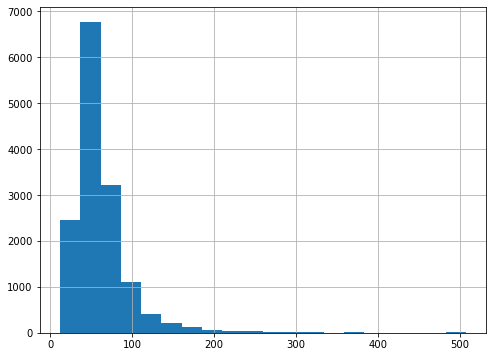

In [49]:
info_and_hist('total_area', 20)

From the descriptive statistics and the histogram, the following conclusions can be drawn:

- Most of the objects have a total area of up to 100 square meters;

- There is a noticeable peak on the graph, corresponding to the total area of objects of 45-55 square meters;

- In addition to plausible and frequent values, there are objects with a very large area - more than 250 square meters, but there are very few such observations.

count    14477.000000
mean        35.735737
std         22.639196
min          2.000000
25%         19.700001
50%         30.799999
75%         43.150002
max        347.500000
Name: living_area, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


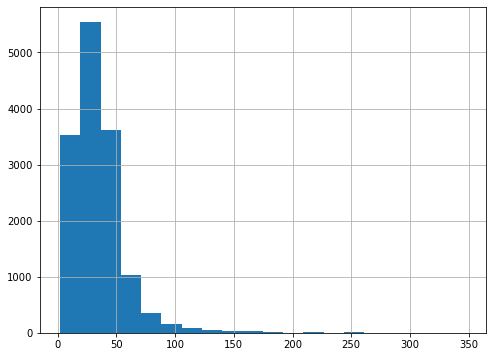

In [50]:
info_and_hist('living_area', 20)

- Most of the objects have a living area up to 50 square meters;

- The graph shows a peak in the area of the value of the living area of 25 square meters;

- There are objects with very large living area - more than 150 square meters (most likely these are the same objects with a large total area).

count    14477.000000
mean        10.548039
std          6.140984
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.199997
Name: kitchen_area, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


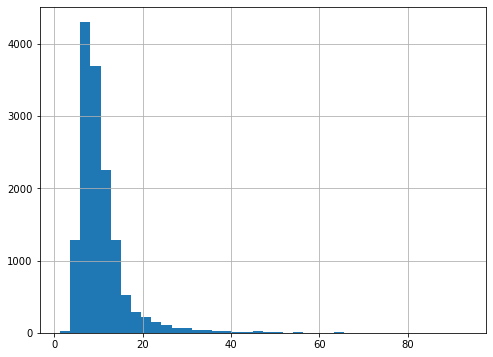

In [51]:
info_and_hist('kitchen_area', 40)

- Most of the objects have a kitchen area of 5-15 square meters;

- There are objects with very small kitchens (for example, the smallest kitchen - 1.3 square meters) and very large ones (more than 35-40 square meters);

- The most typical kitchen area is 9 square meters.

count    1.447700e+04
mean     6.769509e+06
std      9.153063e+06
min      1.219000e+04
25%      3.570000e+06
50%      4.850000e+06
75%      7.000000e+06
max      3.300000e+08
Name: last_price, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


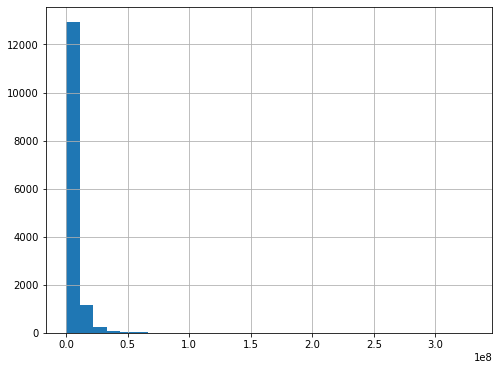

In [52]:
info_and_hist('last_price', 30)

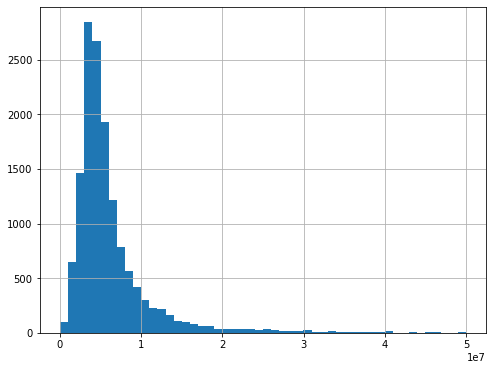

In [53]:
# Histogram for object price without outliers
data.query('last_price < 50000000')['last_price'].hist(bins=50, figsize=(8, 6));

Apartment prices look plausible - half of all apartments cost 3.6 - 7 million. The picture is somewhat distorted by the super-high prices that are in the fourth quartile of the distribution (apartments worth more than 50 million).


Probably objects with a large area and have a super-high price. If so, the data can be considered plausible. After all, the real estate market also has a lot of "average" options, but there are very "bad" ones (with a small area, far from the city center, cheap) and very "good" ones (and therefore very expensive).

As for very small objects, it is possible that a room, a share of an apartment, an apartment converted from office space was put up for sale.

count    14477.000000
mean         2.135594
std          1.089553
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


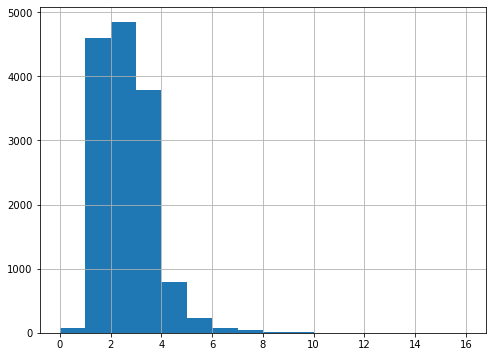

In [54]:
info_and_hist('rooms', 16)

- Most objects have 1-3 rooms;
- There are "strange" objects with 0 rooms (maybe that's how they designated a studio apartment);
- Objects with 10 or more rooms can be considered rare.

count    14477.000000
mean         2.726814
std          0.276442
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


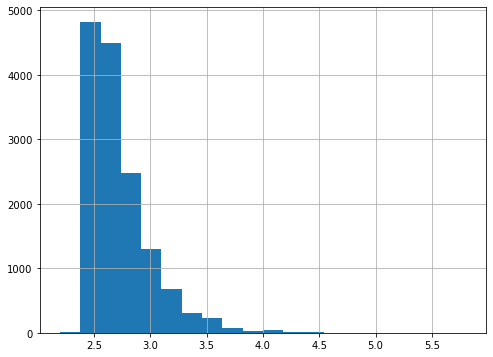

In [55]:
info_and_hist('ceiling_height', 20)

- The graph shows a peak near the ceiling height of 2.5 meters;
- Most of the objects have a ceiling height of 2.2-2.8 meters;
- There are unusual objects with very high ceilings - more than 4 meters

In St. Petersburg, it is possible to imagine an apartment with five-meter ceilings (in the old fund).

count    14468.000000
mean        10.171827
std          6.198580
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


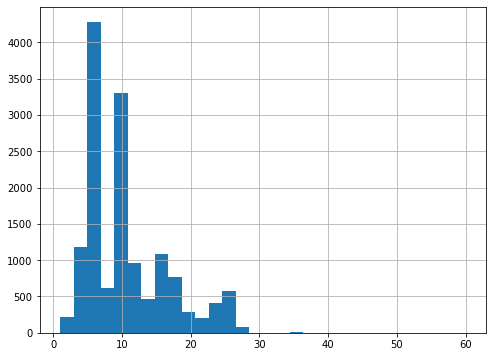

In [56]:
info_and_hist('floors_total', 30)

- Two clear peaks - in the dataset, many apartments are for sale in 5- and 9-storey buildings;
- Most of the apartments are grouped around the values of 1-27 floors;
- Three quarters of objects are located in buildings up to 14 floors;
- There are also objects in high-rise buildings up to 60 floors, but there are very few such objects.

count    14477.000000
mean         5.623057
std          4.616593
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: floor, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


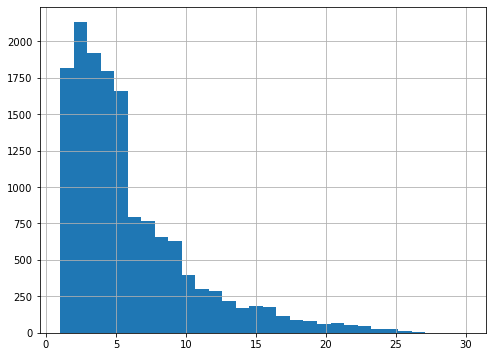

In [57]:
info_and_hist('floor', 30)

- Most of the apartments are located on the 1st-5th floor (you can understand, since there is a lot of old low-rise building stock in St. Petersburg);
- Three quarters of the objects are located up to the 7th floor;
- We can say that apartments on the 17th and higher floors are a rarity.

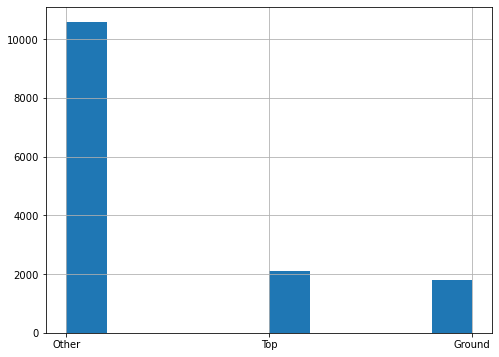

In [58]:
# Histogram for floor types
data['floor_type'].hist(figsize=(8, 6));

- Most of objects are not on top or ground floors;
- Approximately 30% of apartments are sold on the first and last floors.

count    11543.000000
mean     14068.179849
std       8760.530119
min        181.000000
25%       9051.000000
50%      12964.000000
75%      16034.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


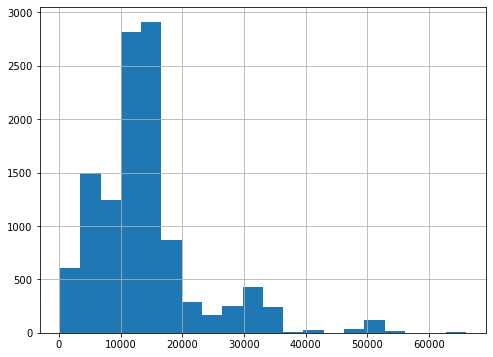

In [59]:
info_and_hist('cityCenters_nearest', 20)

- A peak is visible in the area of 10 km from the city center;
- Most of the objects are grouped at a distance of up to 20 km from the center;
- There are facilities located in the very center of the city;
- About a quarter of the apartments are located 16-66 km from the city center.

count    11523.000000
mean     28821.778703
std      12631.158095
min          0.000000
25%      18551.000000
50%      26750.000000
75%      37091.000000
max      84869.000000
Name: airports_nearest, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


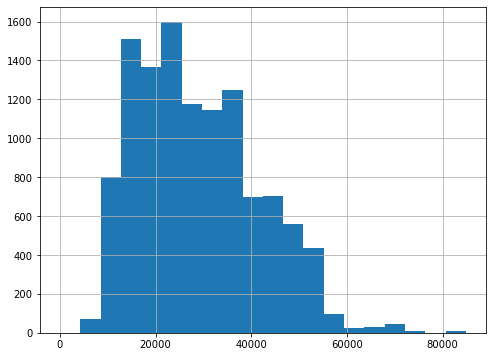

In [60]:
info_and_hist('airports_nearest', 20)

- Half of the objects are located at a distance of 18.5 - 37 km from the airport;
- The fact that there are objects located right at the airport looks strange;
- The distance to the airport is measured by much larger figures than to the city center and other indicators (most likely because many apartments are sold near the city, and there is only one airport in St. Petersburg and is located outside the city).

count    5285.000000
mean      476.628761
std       320.056250
min         3.000000
25%       285.000000
50%       448.000000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


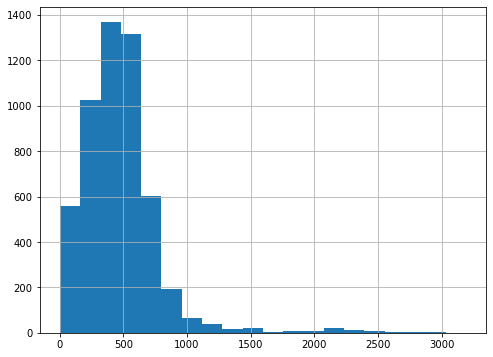

In [61]:
info_and_hist('parks_nearest', 20)

- Three-quarters of properties are located within 600 meters of the nearest park;
- There are objects located far from the parks - more than 1.5 km;

Most likely, these data are plausible, for sure most of the apartments will be located within a radius of 3 km from the nearest park.

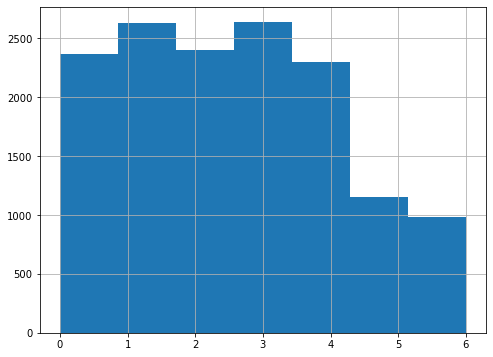

In [62]:
# Histogram for days of the week
data['week_day'].hist(bins=7, figsize=(8, 6));

Less often, ads are published on weekends. Most often - on Tuesdays and Thursdays.

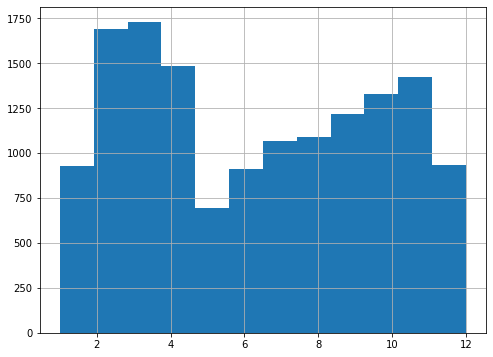

In [63]:
# Histogram for the month
data['month'].hist(bins=12, figsize=(8, 6));

- The most active months of publications are March and February (after the New Year holidays);

- The months in which the least number of ads are published are May (probably due to the May holidays, when everyone is at the barbecue), January (due to the New Year holidays), and the summer months (we can assume that because of the holidays);

- In June, the number of posted ads falls, and then every month until December, the number of ads gradually increases until December and January, in which there is again a drawdown.

<a id="speed"></a> 

### Selling speed

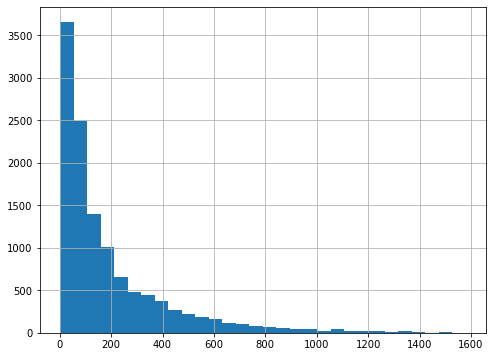

In [64]:
# Selling speed histogram
data['days_exposition'].hist(bins=30, figsize=(8, 6));

In [65]:
# Median property sale rate
print('Median property sale rate:', data['days_exposition'].median(), 'days.')

Median property sale rate: 103.0 days.


In [66]:
# Mean property sale rate
print('Mean property sale rate:', round(data['days_exposition'].mean()), 'days.')

Mean property sale rate: 191 days.


In [67]:
# 90th percentile
round(data['days_exposition'].quantile(0.90))

486

- Half of all apartments are sold in a little more than three months;

- The average number of days before the sale of an object is almost twice as long (that is, the sale lasted more slowly) than the median - large values "pull" the readings too much;

- A quick sale can be called one that happened in less than three months;

- An unusually long sale is a sale lasting more than 486 days (16 months), since 90% of all apartments have already been sold during this time.

<a id="cost_factors"></a> 

### Object cost factors

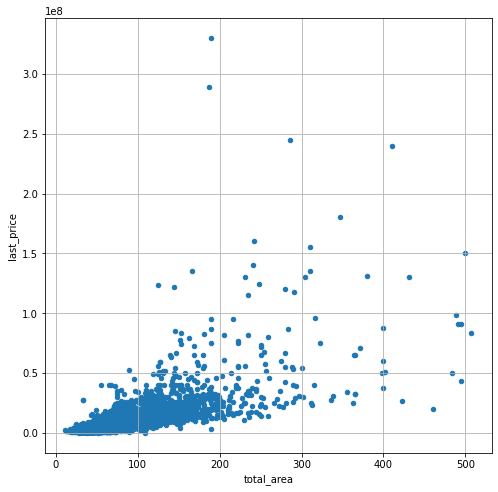

In [68]:
# Scatterplot for price and total area
data.plot(x='total_area', 
          y='last_price', 
          kind='scatter', 
          grid=True, 
          figsize=(8, 8));

Let's look at the correlation coefficient of the price of an object and its total area.

In [69]:
round(data['last_price'].corr(data['total_area']), 3)

0.695

- At small (up to 150 sq. m.) values of the total area, a linear trend is observed: with an increase in the area, the cost of the object increases;

- For large values of the area of the object, a fuzzy positive trend is observed;

- The spread of costs for large values of the area is very large. It can be assumed that apartments and houses with a total area of more than 200 square meters are a kind of "premium segment" of real estate, where not only the area will affect the final cost. In addition, there are not so many objects with a large area in the sample - an additional factor affecting the data noise;

- Correlation parameters show a noticeable positive relationship.

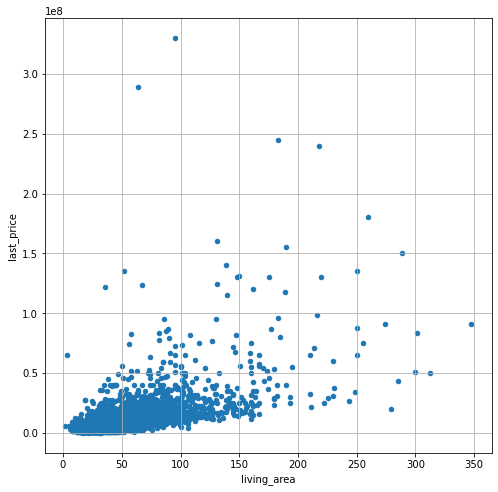

In [70]:
# Scatterplot for Price and Living Area
data.plot(x='living_area', 
          y='last_price', 
          kind='scatter', 
          grid=True, 
          figsize=(8, 8));

In [71]:
# Parameter correlation
round(data['last_price'].corr(data['living_area']), 3)

0.622

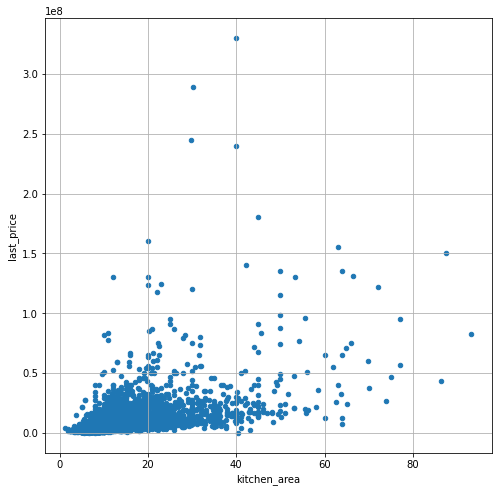

In [72]:
# Scatterplot for price and kitchen area
data.plot(x='kitchen_area', 
          y='last_price', 
          kind='scatter', 
          grid=True, 
          figsize=(8, 8));

In [73]:
# Parameter correlation
round(data['last_price'].corr(data['kitchen_area']), 3)

0.554

- For graphs of the dependence of the price of the object and the living area and the area of the kitchen, the trend is similar to the dependence of the price on the total area: in small areas (up to 100 sq. m of living space and up to 30 sq. m of the kitchen), there is a linear trend towards an increase in the cost of the object with increasing area ;

- However, on large areas, the trend is blurred (the spread in values increases) - not only the area factor affects the final cost of the object;

- Correlation between living space and cost shows a moderate degree of relationship;

- The correlation of kitchen area and cost also shows a moderate, but lesser degree of relationship.

In [74]:
# Function for displaying line chart for selected columns
def line_chart(x, y):
    
    # Line chart on the pivot table
    print(
        data
        .pivot_table(index=x, values=y)
        .reset_index()
        .plot(x=x, 
              y=y, 
              kind='line', 
              grid=True, 
              figsize=(8, 8))
    )

AxesSubplot(0.125,0.125;0.775x0.755)


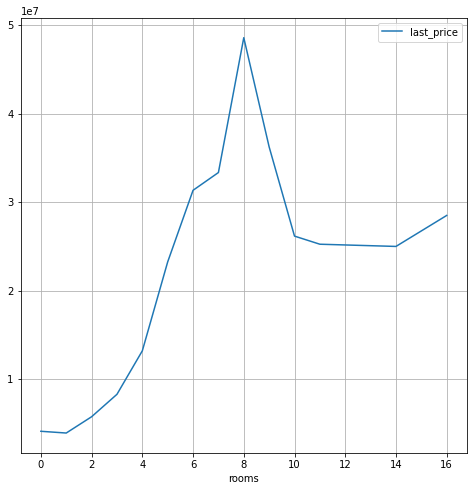

In [75]:
# Line chart on the pivot table for price and number of rooms
line_chart('rooms', 'last_price')

- For objects up to 8 rooms, there is a steady trend towards an increase in cost with an increase in the number of rooms;

- For objects with 9 or more rooms, the trend is lost - there are not so many objects with a large number of rooms in the sample, which affects the data noise. In addition, it is likely that more rooms are associated with country houses (far from the city center, etc.), which is associated with lower cost.

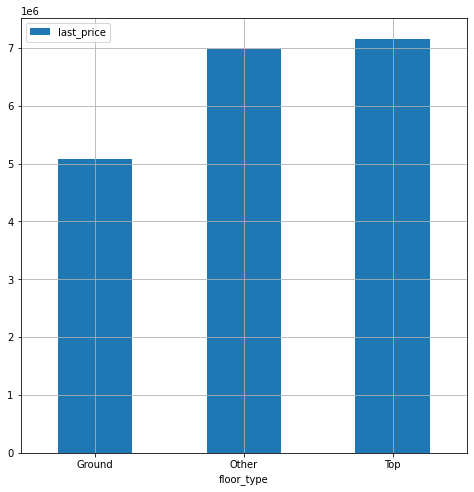

In [76]:
# Pivot table bar chart for price and floor type
(
    data
    .pivot_table(index='floor_type', values='last_price')
    .reset_index()
    .plot(x='floor_type', 
          y='last_price', 
          kind='bar', 
          grid=True, 
          figsize=(8, 8),
          rot=0)
);

- Objects on the ground floor are on average cheaper than others. It is logical that the first floors are often noisier, there may be problems with sewerage, etc. However, the factor of the number of observations also interferes here: the apartments on the ground floor are the least represented in the dataset, which could distort the result.

- Objects on the last and other floors cost about the same.

AxesSubplot(0.125,0.125;0.775x0.755)


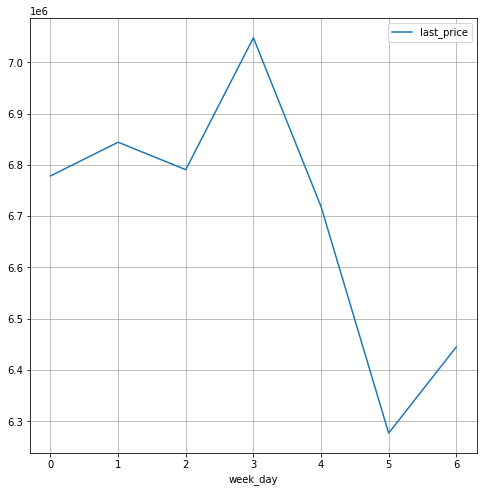

In [77]:
# Line chart on the pivot table for the price and day of the week the ad was published
line_chart('week_day', 'last_price')

- On weekends, properties with the lowest prices are published on average;
- The most expensive objects are published in the middle of the week (Thursday);
- on Monday-Wednesday and Friday objects are published at approximately the same prices;
- The difference in price between days of the week for objects is 1 million euros on Wednesday.

AxesSubplot(0.125,0.125;0.775x0.755)


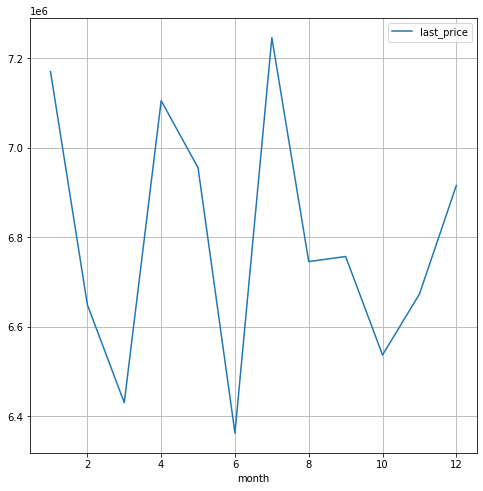

In [78]:
# Line chart on the pivot table for the price and month of ad publication
line_chart('month', 'last_price')

- There is no clear trend of dependence on months or seasons and the price of the object;
- The most expensive objects were published in July and January;
- The cheapest properties were published in February and June.

AxesSubplot(0.125,0.125;0.775x0.755)


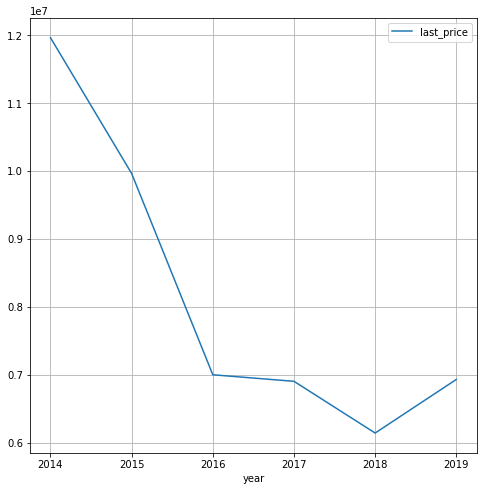

In [79]:
# Line chart on the pivot table for the price and year of ad publication
line_chart('year', 'last_price')

- There is a trend towards a decrease in the average value of real estate from 2014 to 2018;
- In 2015-2016, there was a dramatic decline in prices in the real estate market (a likely consequence of the crisis);
- In 2019, the average property value rose to the level of 2017.

<a id="top10_locations"></a>

### 10 locations with the largest number of ads

Let's find the TOP-10 localities with the largest number of ads and the most expensive and cheapest square meters.

In [80]:
# Number of ads and average price per square meter for each location
locality_price_per_m = data.pivot_table(index='locality_name', 
                                     values='price_per_m', 
                                     aggfunc=['count', 'mean'])

# Rename colunms
locality_price_per_m.columns = ['count', 'mean']

# Sort by number of ads and keep top 10 the largest number of ads
top10_locality_price_per_m = locality_price_per_m.sort_values(by='count', ascending=False).head(10)

# Sort by cost per square meter
top10_locality_price_per_m.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,10089,115552.200990
Пушкин,234,103920.487935
Кудрово,194,96105.431621
Парголово,137,90901.351054
Мурино,228,87816.925267
Петергоф,145,85554.145008
Шушары,217,79538.627637
Колпино,203,75938.525449
Гатчина,149,69992.693669


- Settlements with the **highest** cost per square meter: St. Petersburg, Pushkin, Kudrovo, Pargolovo;
- Settlements with the **lowest** cost per square meter: Vsevolozhsk, Gatchina, Kolpino, Shushary;
- The most expensive square meters and the largest number of ads are expected in St. Petersburg - 115,130;
- The cheapest square meters among the settlements with the largest number of ads in Vsevolozhsk - 67,435;
- Among the 10 locations with the most ads, the "gap" between the highest and lowest price per square meter is nearly 60% (or 47,000).

<a id="citycenter_price"></a>

### Distance to city center and object price

We select apartments in St. Petersburg and calculate the average price for each kilometer.

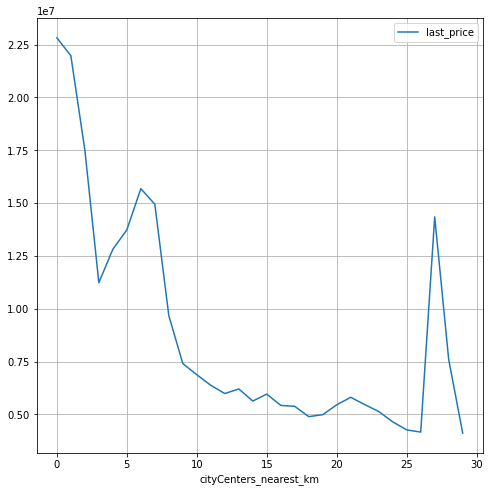

In [81]:
(
    data.
    # select only objects from St. Petersburg
    query('locality_name == "Санкт-Петербург"')
    # average price for each kilometer inside St. Petersburg
    .pivot_table(index='cityCenters_nearest_km', 
                 values='last_price')
    .reset_index()
    # Line chart of price versus distance
    .plot(x='cityCenters_nearest_km', 
          y='last_price', 
          kind='line', 
          grid=True, 
          figsize=(8, 8))
);

In [82]:
print('Average price per 1 km in St. Petersburg:',
    round(data.
    query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
    .reset_index()['last_price']
    .mean())
)

Average price per 1 km in St. Petersburg: 8885414


- The most expensive objects are located in the city center;

- The cheapest objects are located far from the center (further 12 km);

- A trend towards a decrease in the cost of an object with the removal of its location from the city center is generally visible;

- Local peaks in the cost of objects are located at a distance of 6-7 km and 27 km from the center of St. Petersburg. Perhaps there are premium residential complexes or prosperous areas (Pushkin, with its high cost per square meter, is located just in the region of 25 km from St. Petersburg).

<a id="conclusion"></a>

## General conclusion

In this project, the relationship between a number of factors and the cost of an apartment was investigated.

**Input data:** archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years.

**Application of the results:** development of a tool for automated verification of the value of real estate objects.

**Research hypotheses:**

- Hypothesis 1. The price of the object depends on the total area.
- Hypothesis 2. The price of the object depends on the living area.
- Hypothesis 3. The price of the object depends on the area of the kitchen.
- Hypothesis 4. The price of an object depends on the number of rooms.
- Hypothesis 5. The price of the object depends on the floor on which the apartment is located.
- Hypothesis 6. The price of an object depends on the date of placement (day of the week, month, year).
- Hypothesis 7. The price of an object depends on the distance from the city center.
- Hypothesis 8. St. Petersburg has the most expensive real estate.


**Hypothesis 1 was partially confirmed.**

- At small (up to 150 sq. m.) values of the total area, a linear trend is observed: with an increase in the area, the cost of the object increases;

- For large (more than 100 sq. m.) values of the area of the object, the trend is "blurred" - there are both very expensive objects with a relatively small area, and vice versa - huge objects with a low cost. Probably a third factor intervenes here (for example, the "status" of housing is rising). Also, there is not as much data on very large objects as on "ordinary" ones, so the result needs to be double-checked;

- Total area and price are indeed related (cor=0.69).


**Hypothesis 2 was partially confirmed.**

- On small (up to 100 sq. m.) living areas, there is a linear trend towards an increase in the cost of an object with an increase in area;

- On large (more than 100 sq. m.) living areas, the trend is blurred (the spread in values increases) - not only this factor affects the final cost of the object. Also, there are not enough observations for "large" objects - the result needs to be doublechecked;

- Living area and the cost of the object are moderately interconnected (cor=0.62);


**Hypothesis 3 was partially confirmed.**

- On small (up to 20 sq. m.) kitchen areas of the, there is a linear trend towards an increase in the cost of the object with an increase in the area;

- On large areas of kitchens (more than 25 sq. m), the trend is "blurred" (the spread in values increases). This means that not only this factor affects the final cost of the object. Also, there are not enough observations for "large" objects;

- The area of the kitchen and the cost of the object are moderately interconnected (cor=0.55);


**Hypothesis 4 was partially confirmed.**

- For objects up to 8 rooms, there is a steady trend towards an increase in value with an increase in the number of rooms: on average, each room adds 1.5 million RUB;

- For objects with 9 or more rooms, this trend is not observed: probably for such large objects the number of rooms is not a significant indicator (location may play a role - objects with a large number of rooms are most likely country houses). Also, there are not enough observations for "large" objects.


**Hypothesis 5 was fully confirmed.**

- Apartments on the ground floor are on average almost 2 million cheaper than apartments on any other floors (their average cost is 7 million RUB).


**Hypothesis 6 was partially confirmed.**

- The distribution in the price between the days of the week for objects is on avarage 1 million: on weekends the cheapest objects are published, and on Thursdays - the most expensive ones.

- There is no clear trend in the dependence of the price of the object and the date of its publication by months or seasons;

- In 2015-2016, there was a dramatic decline in prices in the real estate market (by an average of 2.5 million per year);

- There is a general trend towards a decrease in the average value of real estate from 2014 to 2018 by half (from 12 to 6 million);

- The average cost of objects began to increase in 2019.


**Hypothesis 7 was partially confirmed.**

- There is a trend towards a decrease in the cost of the object along with its removal from the center of St. Petersburg;
- In the area of 6-7 km and 27 km from the center of St. Petersburg, the cost is slightly higher than the general trend (perhaps the most prestigious areas are located there or another third variable influences).


**Hypothesis 8 was fully confirmed.**

- St. Petersburg really has the most expensive real estate: the average cost per square meter: 115,130.


**Other findings:**
- Localities (for which there is a lot of data) with the highest cost per square meter:
    - St. Petersburg (115 130),
    - Pushkin (103 920),
    - Kudrovo (96 105),
    - Pargolovo (90 901);

- Localities (for which there is a lot of data) with the lowest cost per square meter:
    - Vsevolozhsk (67 434),
    - Gatchina (69 993),
    - Kolpino (75 939),
    - Shushary (79 539);

- The average price of one kilometer from the center of St. Petersburg is 8,885,414;

- Half of all ads close after 103 days;


**Recommendations:**

- Leave as a factor influencing the final cost of the object, only one of the three area indicators: the total area of the object, since it most strongly correlates with the cost; this will eliminate multicollinearity (multiple relationships) between factors;

- For objects with up to 8 rooms, you can enable the number of rooms parameter as a factor that determines the price. For objects with more rooms, this indicator will not be decisive;

- Pay attention to objects that hang on the site for more than 486 days (16 months) - this time is unusually long, 90% of ads are closed during this time;

- Leave as a factor influencing the final cost of the object, the floor parameter in the format "groung - non-ground";

- Leave as a factor the day of the week the ad was published (on weekdays, prices are about 1 million higher);

- Leave as a factor the year of publication of the announcement (the later the object was exhibited in the period from 2014 to 2018, the lower its cost);

- Leave as a factor the locality in which the object is located;

- Leave as a factor the remoteness of the object from the city center.